# Antish kumar

In [1]:
# importing libraries 

import numpy as np   ## this will import the 'numpy' library as "np" used for numerical operations.

import pandas as pd  ## this will import the 'pandas' library as "pd" used for data manipulation and analysis.

import matplotlib.pyplot as plt ## this will import the 'pyplot' module as "plt" from 'matplotlib' library 
                                ##used for creating staic,animated,and intractive visualization.

import seaborn as sns  ## this will import the 'seaborn' library as "sns" used for creating 
                       ## high-level interface for drawing attractive and informative statistical graphics

import warnings
warnings.filterwarnings('ignore')
    
## Splitting datasets, building a k-nearest neighbors classifier, 
## and evaluating classification models (scikit-learn).

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

In [2]:
## creating a dataframe and store in data as Data frame

data=pd.read_csv('Iris Flower - Iris.csv')


In [3]:
## it will print the head (first 5 rows) of the data frame

data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# drope id column
data = data.drop('Id',axis='columns')

In [5]:
# sucessfully drop ID column
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
## it will print the all major information about the data 

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
## to display no. of samples on each class

data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
##  to display stats about data

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
## preprocessing the dataset

# cheack for null values
data.isnull().sum() # in this data set we don't have null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

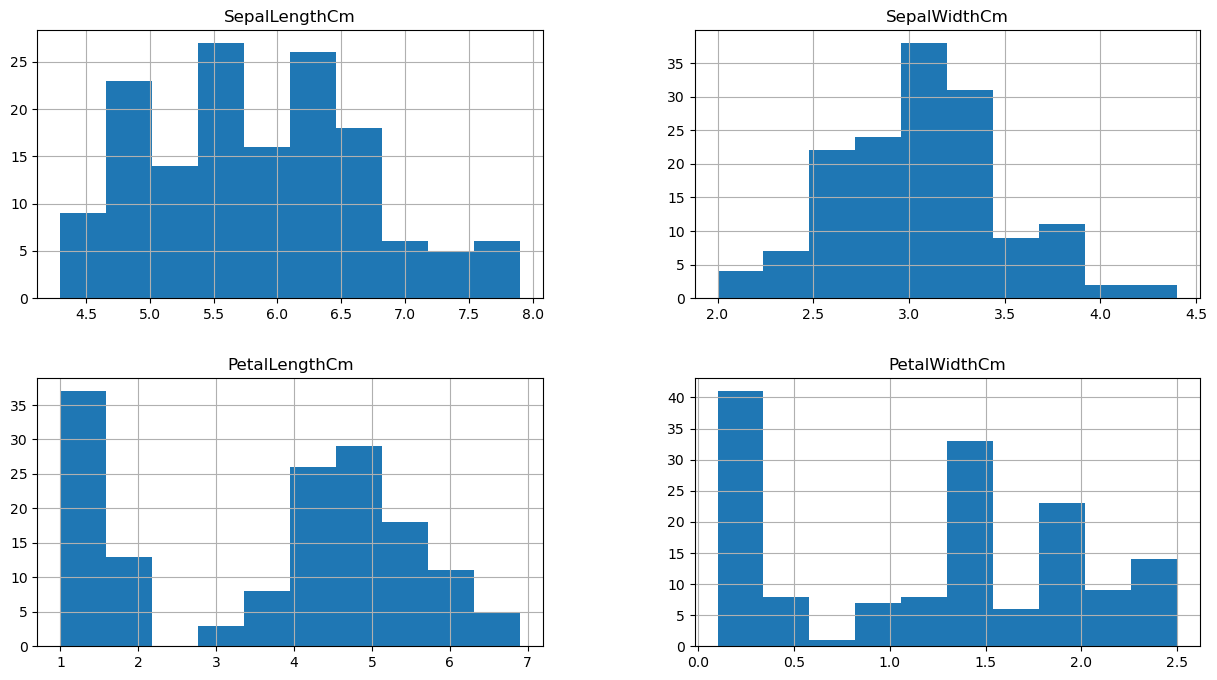

In [10]:
## data analysis

# histrograms
data.hist(figsize= (15,8))
plt.show()

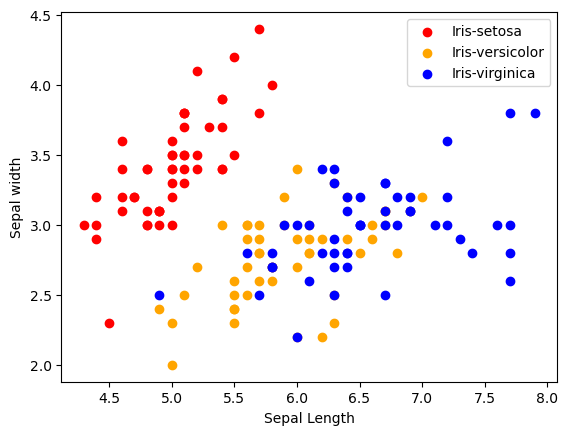

In [11]:
## scatterplot

colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x = data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colors[i],label = species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

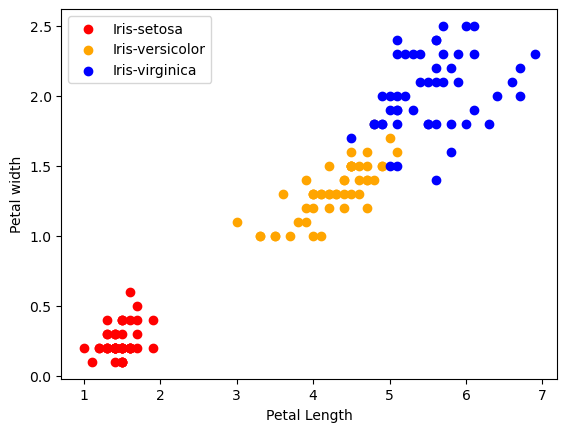

In [12]:
for i in range(3):
    x= data[data['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i],label = species[i])
    
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

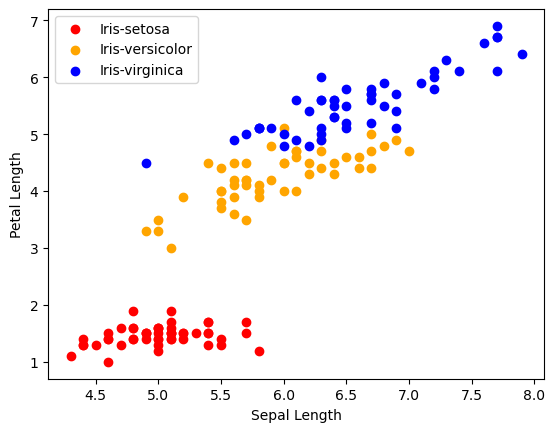

In [13]:
for i in range(3):
    x= data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c = colors[i],label = species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

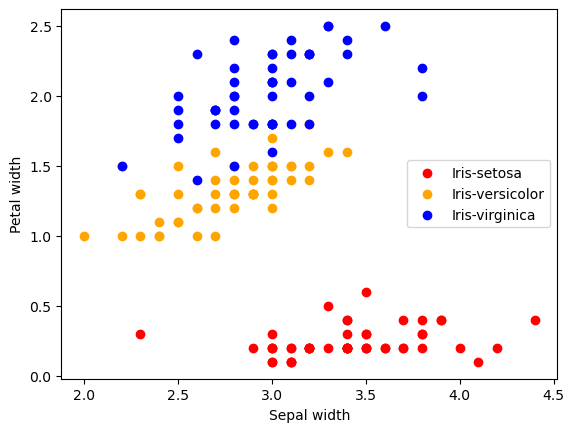

In [14]:
for i in range(3):
    x= data[data['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c = colors[i],label = species[i])
    
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend()
plt.show()

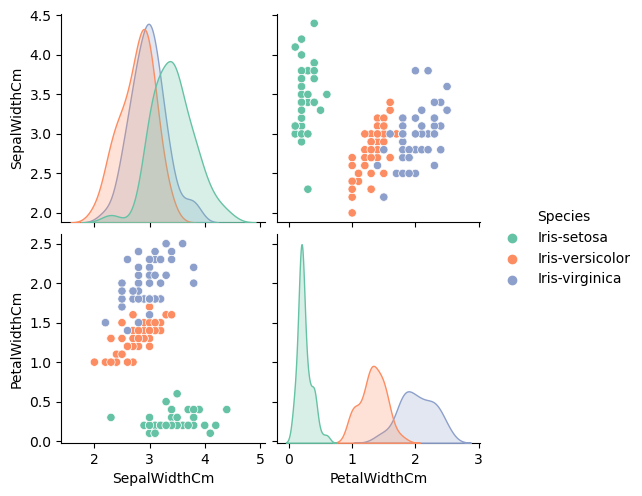

In [15]:

sns.pairplot(data, vars=['SepalWidthCm', 'PetalWidthCm'],hue='Species',palette='Set2')
labels =['Iris-setosa','Iris-versicolor','Iris-virginica']
plt.show()

## Coorelation Matrix
A cooralation matrix ia a table showing coorelation coefficient between varables.Each cell in the tables shows the coorelation between two variables. the values is in the range of -1 to 1.if two varibles have high coorelation.we can neglect one variable form those two


In [16]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


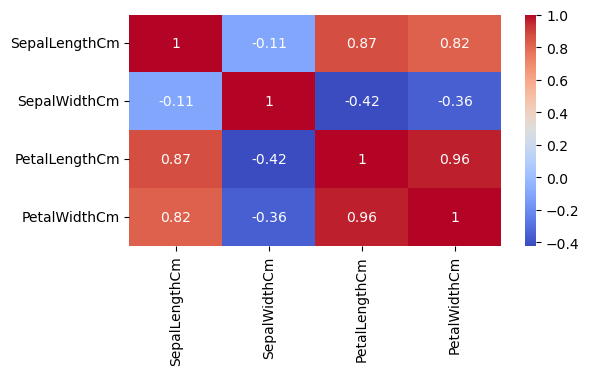

In [17]:
corr = numeric_data.corr()
fig, ax = plt .subplots(figsize=(6,3))
sns.heatmap(corr,annot=True, ax=ax,cmap='coolwarm')

plt.show()

# Label Encoder
in machin learning we usually deals with datasets which contains multiple labels in one or more than one columns. these label can be in the form of words or numbers. Label Encoding refers to converting the labels into numberic form so as to convert it into the maching- readable form 

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
data['Species'] = le.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
data['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

# Model Training

In [21]:
from sklearn.model_selection import train_test_split
# train = 70 %
# test = 30 %

X = data.drop(columns=['Species'])
Y = data['Species']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.15)


In [22]:
## logistic regression
from sklearn.linear_model import LogisticRegression
 
LR = LogisticRegression()

In [23]:
# model training
LR.fit(x_train,y_train)

LogisticRegression()

In [24]:
# print metrix to get performance
print("test Accuracy:",LR.score(x_test,y_test)*100)
print("train Accuract:",LR.score(x_train,y_train)*100)

test Accuracy: 95.65217391304348
train Accuract: 97.63779527559055


In [25]:
## Knn - K-neareast neighbours

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()

In [26]:
# model training

KNC.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
print("test Accuracy:",KNC.score(x_test,y_test)*100)
print("train Accuract:",KNC.score(x_train,y_train)*100)

test Accuracy: 95.65217391304348
train Accuract: 96.06299212598425


In [28]:
## decission tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [29]:
# model training

DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
print("test Accuracy:",DTC.score(x_test,y_test)*100)
print("train Accuract:",DTC.score(x_train,y_train)*100)

test Accuracy: 95.65217391304348
train Accuract: 100.0


## Saving the model

In [31]:
import os,joblib

In [32]:
os.makedirs('model',exist_ok = True)

In [33]:
joblib.dump(LR,"./model/LogicalRegression.lb")
joblib.dump(KNC,"./model/K-nearest.lb")
joblib.dump(DTC,"./model/DecissionTree.lb")

['./model/DecissionTree.lb']

## Prediction

In [34]:
# prediction through LogicalRegresson 
LRprediction = LR.predict(x_test)

In [35]:
pred = list(LRprediction)
actual = list(y_test)

LRcomprasion_df = pd.DataFrame({'Actual':actual,'Prediction':pred})
LRcomprasion_df.head(20)

,Actual,Prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,2,2
6,1,1
7,1,1
8,2,2
9,0,0


In [36]:
# prediction through KNeighborsClassifier
KNCprediction = KNC.predict(x_test)
actual = list(y_test)

KNCcomprasion_df = pd.DataFrame({'Actual':actual,'Prediction':pred})
KNCcomprasion_df.head(20)

,Actual,Prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,2,2
6,1,1
7,1,1
8,2,2
9,0,0


In [37]:
# prediction through DecissionTree 
DTCprediction = DTC.predict(x_test)
actual = list(y_test)

DTCcomprasion_df = pd.DataFrame({'Actual':actual,'Prediction':pred})
DTCcomprasion_df.head(20)

,Actual,Prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,2,2
6,1,1
7,1,1
8,2,2
9,0,0


In [38]:
print(classification_report(LRcomprasion_df['Actual'],LRcomprasion_df['Prediction']))
print(accuracy_score(LRcomprasion_df['Actual'],LRcomprasion_df['Prediction'])*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.89      0.94         9
           2       0.86      1.00      0.92         6

    accuracy                           0.96        23
   macro avg       0.95      0.96      0.95        23
weighted avg       0.96      0.96      0.96        23

95.65217391304348


## Making prediction on giving outputs

In [39]:
## this prediction is throught Linear Regression algorithem

def flower_predict():
    sepal_length = float(input("Enter sepal length: "))
    sepal_width = float(input("Enter sepal width: "))
    petal_length = float(input("Enter petal length: "))
    petal_width = float(input("Enter petal width: "))
    flower_predict_LR(sepal_length,sepal_width,petal_length,petal_width)

def flower_predict_LR(sepal_length,sepal_width,petal_length,petal_width):
    input_data =[[sepal_length,sepal_width,petal_length,petal_width]]
    prediction = LR.predict(input_data)
    label_dict = {'0':'Iris-setosa','1':'Iris-versicolor','2':'Iris-virginica'}
    result = label_dict[str(prediction[0])]
    print(f"The Linear Regression model predict the species as :{result}")
    print(f"The model Accuracy :{LR.score(x_test,y_test)*100} % ")
    

In [40]:
flower_predict()

Enter sepal length: 2
Enter sepal width: 1
Enter petal length: 4
Enter petal width: 1
The Linear Regression model predict the species as :Iris-versicolor
The model Accuracy :95.65217391304348 % 


In [41]:
## this prediction is throught DecissionTreeClassifier algorithem

def flower_prediction3():
    sepal_length = float(input("Enter sepal length: "))
    sepal_width = float(input("Enter sepal width: "))
    petal_length = float(input("Enter petal length: "))
    petal_width = float(input("Enter petal width: "))
    flower_predict_DTC(sepal_length,sepal_width,petal_length,petal_width)

def flower_predict_DTC(sepal_length,sepal_width,petal_length,petal_width):
    input_data =[[sepal_length,sepal_width,petal_length,petal_width]]
    prediction = DTC.predict(input_data)
    label_dict = {'0':'Iris-setosa','1':'Iris-versicolor','2':'Iris-virginica'}
    result = label_dict[str(prediction[0])]
    print(f"The Decission Tree classifiers model predict the species as :{result}")
    print(f"The model Accuracy :{DTC.score(x_test,y_test)*100} % ")

In [42]:
flower_prediction3()

Enter sepal length: 2
Enter sepal width: 1
Enter petal length: 4
Enter petal width: 1
The Decission Tree classifiers model predict the species as :Iris-versicolor
The model Accuracy :95.65217391304348 % 


# THANK YOU 😁